In [58]:
import random
import simpy
import numpy as np
from random import seed
import statistics
seed(29384)  # for seed of randint function
random_seed = 42  # for seed of other random generators
new_customers = 10  # Total number of customers in the system
interarrival = numpy.random.poisson(6, size=None)  # Generate new customers roughly every x seconds
waitingTimes = []
serviceTimes = []
interarrivalTimes = []

def generator(env, number, interval, server):  # customer generator with interarrival times.
    """generator generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % i, server, service_time=random.expovariate(0.15))
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)  # adds time to the counter, does not delete from the memory

def customer(env, name, server, service_time):
    # customer arrives to the system, waits and leaves
    arrive = env.now
    print('%7.4f : Arrival time of %s' % (arrive, name))
    with server.request() as req:
        results = yield req | env.timeout(arrive)
        
        if req in results:
            servertime = service_time
            yield env.timeout(servertime)
            serviceTimes.append(servertime)
            print('%7.4f Departure Time of %s' % (env.now, name))
            print('%7.4f Time Spent in the system of %s' % (env.now - arrive, name))
        else:
            waiting_time = env.now - arrive
            waitingTimes.append(waiting_time)
            print('%6.3f Waiting time of %s' % (waiting_time, name))

random.seed(random_seed)
env = simpy.Environment()
server = simpy.Resource(env, capacity=1)  # capacity changes the number of generators in the system.
env.process(generator(env, new_customers, interarrival, server))
env.run()
interarrivalTimes.append(interarrival)
print(f"{interarrivalTimes}AAAAAAAAAAAAAAAAAA")
average_interarrival = statistics.mean(interarrivalTimes)
average_waitingTime = statistics.mean(waitingTimes)
average_serviceTime = statistics.mean(serviceTimes)
print("Average Interravial Time Is : %7.4f" % (average_interarrival))
print("Average Waiting Time Is : %7.4f" % (average_waitingTime))
print("Average Service Time Is : %7.4f" % (average_serviceTime))

print("Elements of given array: ")
for i in range(0, len(interarrivalTimes)):
    print(interarrivalTimes[i]),

 0.0000 : Arrival time of Customer00
 0.1013 : Arrival time of Customer01
 0.101 Waiting time of Customer01
 1.1117 : Arrival time of Customer02
 1.112 Waiting time of Customer02
 5.6284 : Arrival time of Customer03
 5.9922 : Arrival time of Customer04
 6.1132 : Arrival time of Customer05
 6.8004 Departure Time of Customer00
 6.8004 Time Spent in the system of Customer00
 8.9288 : Arrival time of Customer06
 9.8156 : Arrival time of Customer07
 5.992 Waiting time of Customer04
 6.113 Waiting time of Customer05
12.9649 : Arrival time of Customer08
16.5241 : Arrival time of Customer09
 8.929 Waiting time of Customer06
 9.816 Waiting time of Customer07
21.6490 Departure Time of Customer03
16.0206 Time Spent in the system of Customer03
23.3092 Departure Time of Customer08
10.3443 Time Spent in the system of Customer08
34.3608 Departure Time of Customer09
17.8366 Time Spent in the system of Customer09
[4]AAAAAAAAAAAAAAAAAA
Average Interravial Time Is :  4.0000
Average Waiting Time Is :  5.3

0.5012461006192153 customer 1 arrives
0.5012461006192153 customer 1 served
0.5916483776272133 customer 2 arrives
0.935959877987546 customer 1 departs
0.935959877987546 customer 2 served
1.7163301442089125 customer 3 arrives
1.8352731079569828 customer 2 departs
1.8352731079569828 customer 3 served
1.9177061799668214 customer 4 arrives
2.0700621892836573 customer 3 departs
2.0700621892836573 customer 4 served
2.3265978974924995 customer 4 departs
2.415705407939779 customer 5 arrives
2.415705407939779 customer 5 served
2.4246216647320824 customer 5 departs
2.8424386550209535 customer 6 arrives
2.8424386550209535 customer 6 served
2.8575122047801433 customer 6 departs
2.9605927723342322 customer 7 arrives
2.9605927723342322 customer 7 served
3.077236761093819 customer 7 departs
3.60903840950015 customer 8 arrives
3.60903840950015 customer 8 served
3.683061057233967 customer 8 departs
3.988691491073004 customer 9 arrives
3.988691491073004 customer 9 served
3.9910558286154774 customer 9 dep

Text(0, 0.5, 'Length')

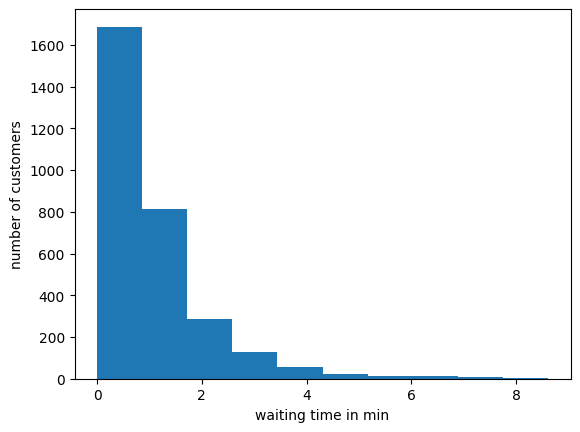

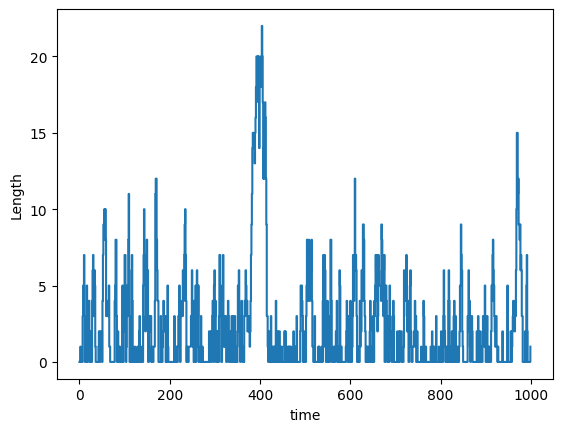

In [55]:
# to define a process we need a generator

# three customers arrive per minute
def generate_interarrival():
    return np.random.exponential(1./3.0)

# 4 customers can be helped per minute
def generate_service():
    return np.random.exponential(1./4.0)

# GENERATOR FUNCTION
def cafe_run(env, servers):
    """
    First argument is the environment that it will be operating in
    second argument is the server, so that the process knows what are
    the servers that it have access to

    
    Start with a loop

    """
    # set i in order to be able to identify customers
    i = 0 
    while True:
        i += 1
        yield env.timeout(generate_interarrival())
        # once it arrives we can handle that customer event
        env.process(customer(env, i, servers))

waiting_time = []

def customer(env, customer, servers):
    """
    First argument is the environment that it will be operating in
    second argument is the server, so that the customer generator knows what are
    the servers that it have access to
    
    """
    # from a customer perspective, first thing they have to do is request a server
    with servers.request() as request:
        arrival_time = env.now
        # request a server from shared server variable
        # so here customer arrives
        print(f"{env.now} customer {customer} arrives")
        yield request 
        # wait till get request gets satisfied
        # so here it gets serviced
        print(f"{env.now} customer {customer} served")
        yield env.timeout(generate_service())
        # here the customer has departed
        print(f"{env.now} customer {customer} departs")
        departure_time = env.now
        waiting_time.append(departure_time - arrival_time)

observation_times = []
queue_lengths = []

def observe(env, servers):
    while True:
        observation_times.append(env.now)
        # the list of all the objects waiting for that service
        # we can take the length of that
        queue_lengths.append(len(servers.queue))
        # yield to wait one minute between observations
        yield env.timeout(1.0)



np.random.seed(13)
env = simpy.Environment()

# create a share resource
servers = simpy.Resource(env, capacity=1)
env.process(cafe_run(env, servers))
env.process(observe(env, servers))
env.run(until=1000) # does not do anything yet cause we need to built our model








import matplotlib.pyplot as plt

plt.figure()
plt.hist(waiting_time)
plt.xlabel("waiting time in min")
plt.ylabel("number of customers")

plt.figure()
plt.step(observation_times, queue_lengths, where="post")
plt.xlabel("time")
plt.ylabel("Length")


